In [1]:
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image,UnidentifiedImageError
from pathlib import Path

# Set visualization style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Define the root path (Adjust this if the dataset folder name is slightly different after adding)
dataset_path = Path('/kaggle/input/spacenet-an-optimally-distributed-astronomy-data')

# Check if path exists and list top-level folders
if dataset_path.exists():
    print(f"Dataset found at: {dataset_path}")
    print("Top level contents:", os.listdir(dataset_path))
else:
    print("Dataset not found. Please ensure you have added the dataset to the notebook.")

# Helper function to get all image paths and labels
def get_image_data(root_path):
    image_paths = []
    labels = []
    
    # We assume the dataset follows the structure: root/class_name/image.jpg
    # Using rglob to find all standard image formats recursively
    for ext in ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tif']:
        for path in root_path.rglob(ext):
            image_paths.append(str(path))
            # Usually the parent folder name is the class label
            labels.append(path.parent.name)
            
    return pd.DataFrame({'path': image_paths, 'label': labels})

# Create the DataFrame
df = get_image_data(dataset_path)

# Display first few rows
print(f"Total images found: {len(df)}")
df.head()

Dataset found at: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data
Top level contents: ['SpaceNet.FLARE.imam_alam']
Total images found: 12824


path   label
0  /kaggle/input/spacenet-an-optimally-distribute...  planet
1  /kaggle/input/spacenet-an-optimally-distribute...  planet
2  /kaggle/input/spacenet-an-optimally-distribute...  planet
3  /kaggle/input/spacenet-an-optimally-distribute...  planet
4  /kaggle/input/spacenet-an-optimally-distribute...  planet

Classes found and their counts:
           Class  Count
0         galaxy   3984
1           star   3269
2  constellation   1552
3         planet   1472
4         nebula   1192
5     black hole    656
6          comet    416
7       asteroid    283


/tmp/ipykernel_55/3600617722.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=class_counts, x='Class', y='Count', palette='viridis')


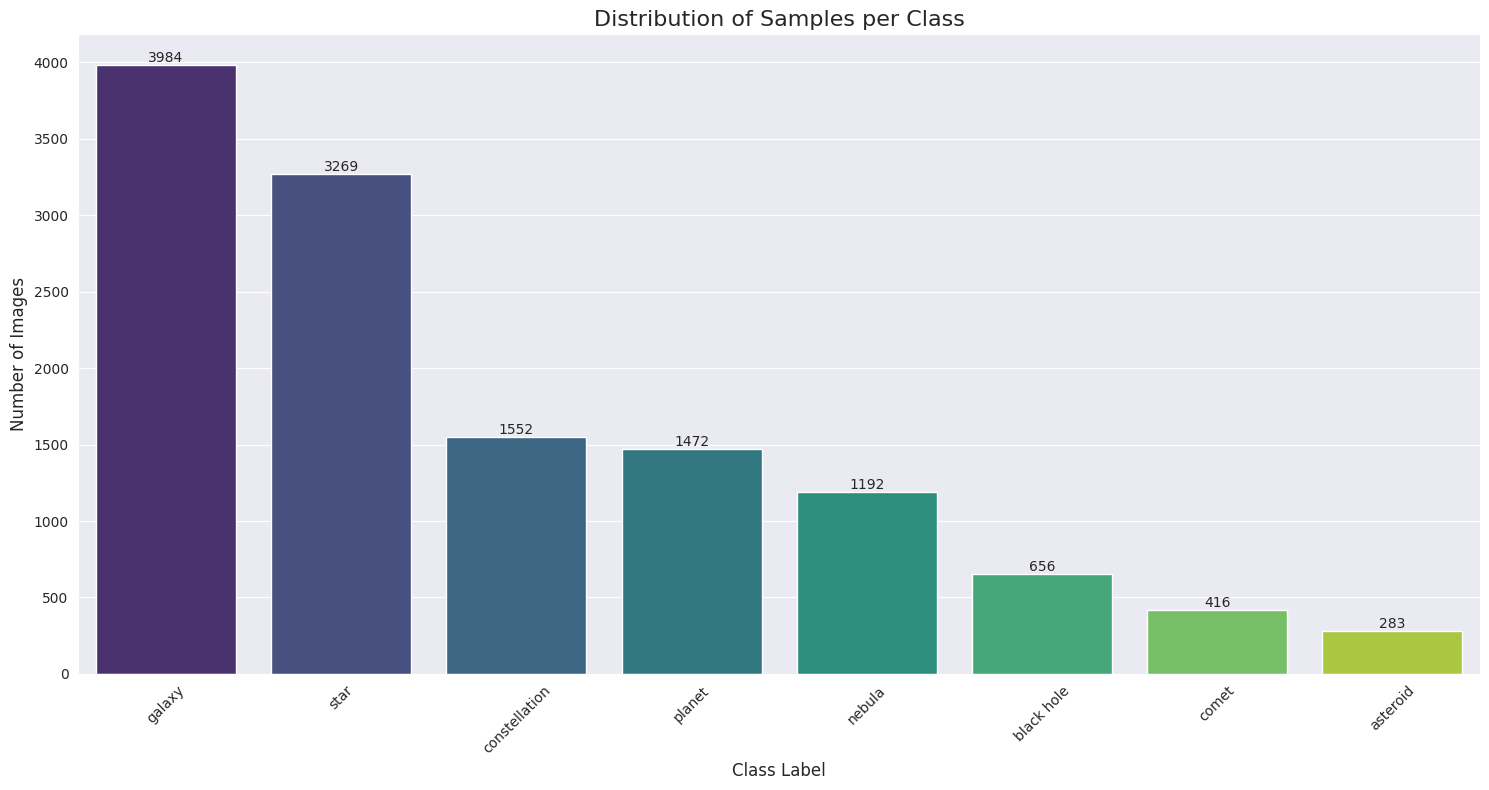

Most frequent class: 3984 samples
Least frequent class: 283 samples
Observation: The dataset appears to be Imbalanced.


In [3]:
#  Identify all classes and number of samples per class
class_counts = df['label'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

print("Classes found and their counts:")
print(class_counts)

# Plot the class distribution
plt.figure(figsize=(15, 8))
barplot = sns.barplot(data=class_counts, x='Class', y='Count', palette='viridis')
plt.title('Distribution of Samples per Class', fontsize=16)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, v in enumerate(class_counts['Count']):
    barplot.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Check for imbalance
min_count = class_counts['Count'].min()
max_count = class_counts['Count'].max()
print(f"Most frequent class: {max_count} samples")
print(f"Least frequent class: {min_count} samples")
if max_count / min_count > 1.5:
    print("Observation: The dataset appears to be Imbalanced.")
else:
    print("Observation: The dataset appears relatively Balanced.")

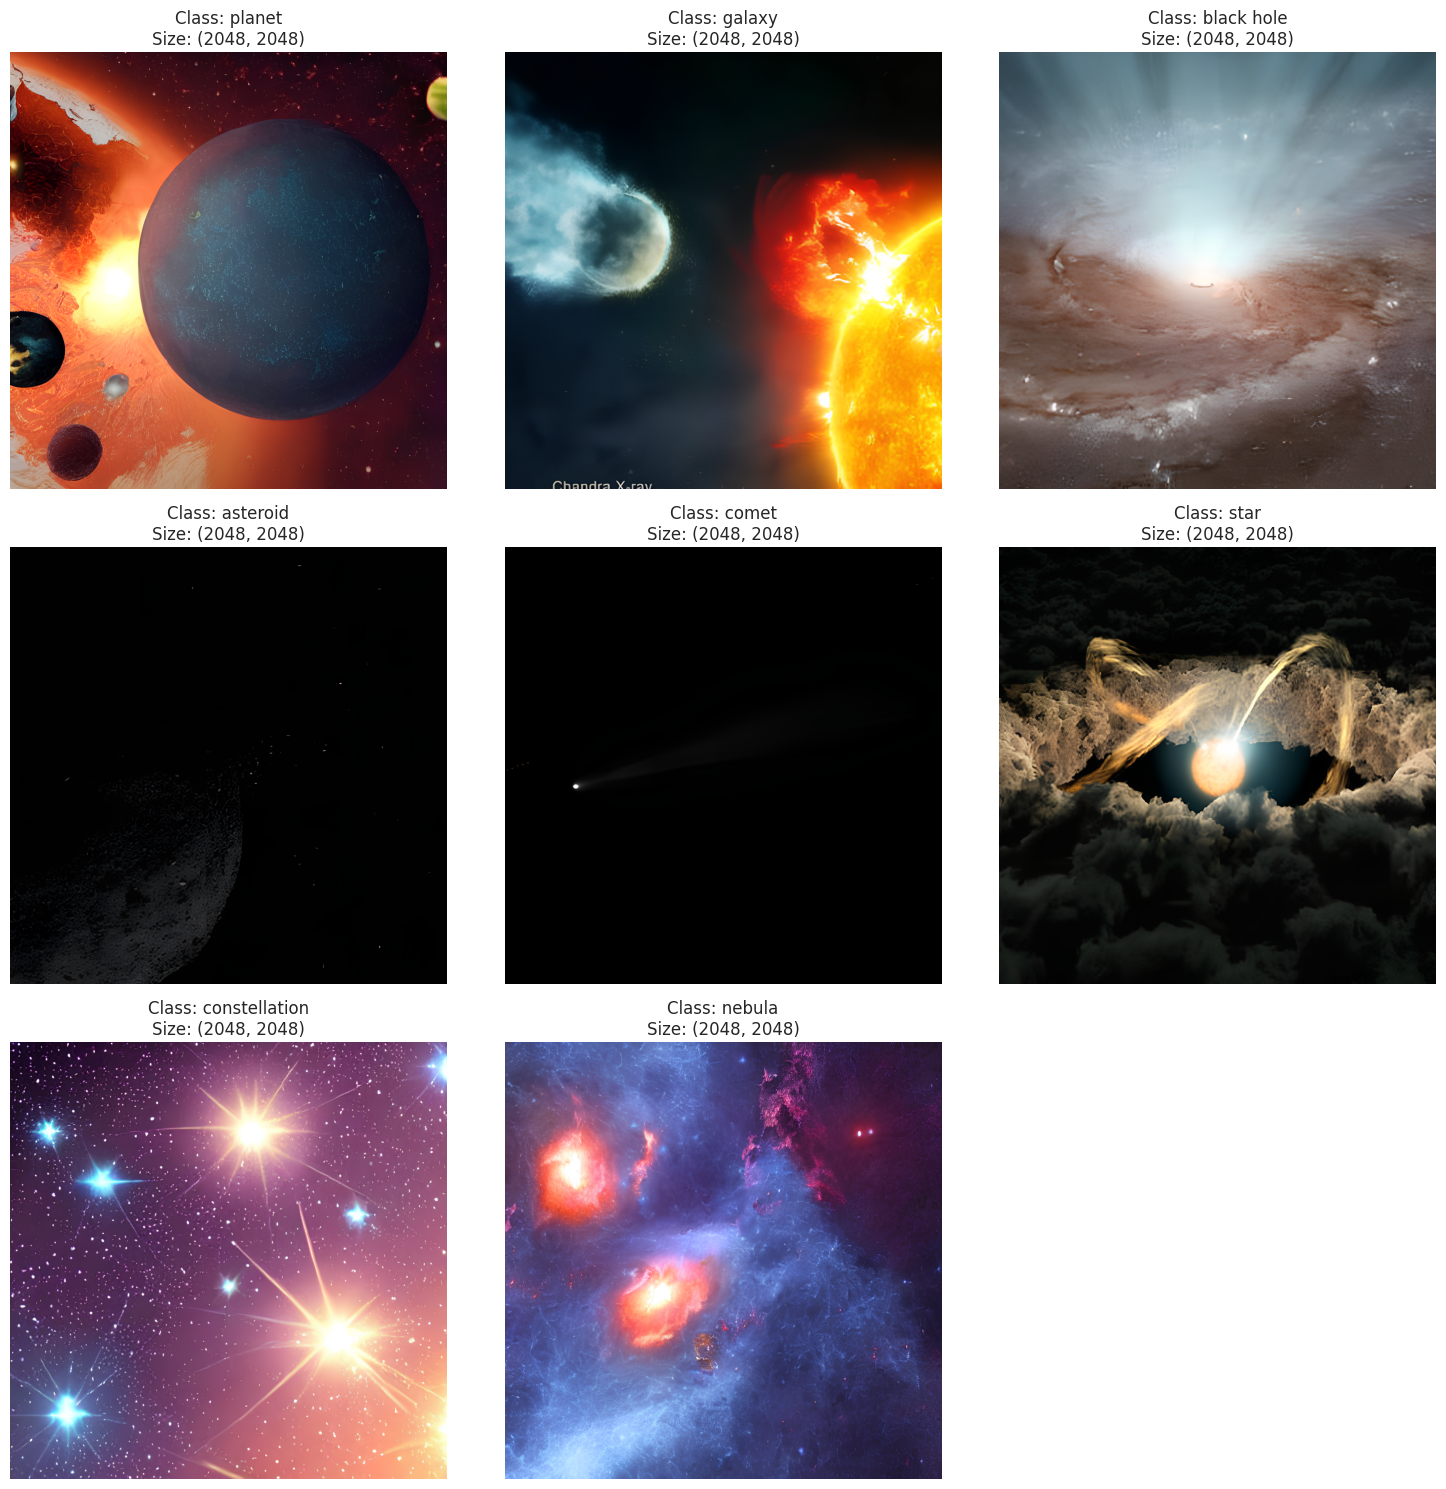

In [4]:
# Visualize random samples from each class
unique_classes = df['label'].unique()
num_classes = len(unique_classes)

cols = 3
rows = (num_classes + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))

for i, class_name in enumerate(unique_classes):
    # Get list of all images for this class
    class_paths = df[df['label'] == class_name]['path'].values
    
    found_valid_image = False
    attempts = 0
    max_attempts = 20  
    while not found_valid_image and attempts < max_attempts:
        try:
            sample_path = np.random.choice(class_paths)
            
            img = Image.open(sample_path)
            
            img.load()
            
            plt.subplot(rows, cols, i + 1)
            plt.imshow(img)
            plt.title(f"Class: {class_name}\nSize: {img.size}")
            plt.axis('off')
            
            found_valid_image = True # Exit the while loop
            
        except (UnidentifiedImageError, OSError, SyntaxError):
            attempts += 1
            
    if not found_valid_image:
        print(f"⚠️ Warning: Could not display image for class '{class_name}' (all sampled files were corrupt).")

plt.tight_layout()
plt.show()

Error reading /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_19_SwinIR_large.png: cannot identify image file '/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_19_SwinIR_large.png'
Error reading /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_4_image_10_3_SwinIR_large.png: cannot identify image file '/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_4_image_10_3_SwinIR_large.png'
Error reading /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_6_image_18_aug3_SwinIR_large.png: cannot identify image file '/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_6_image_18_aug3_SwinIR_large.png'
Error reading /kaggle/input/spacenet-an-opti

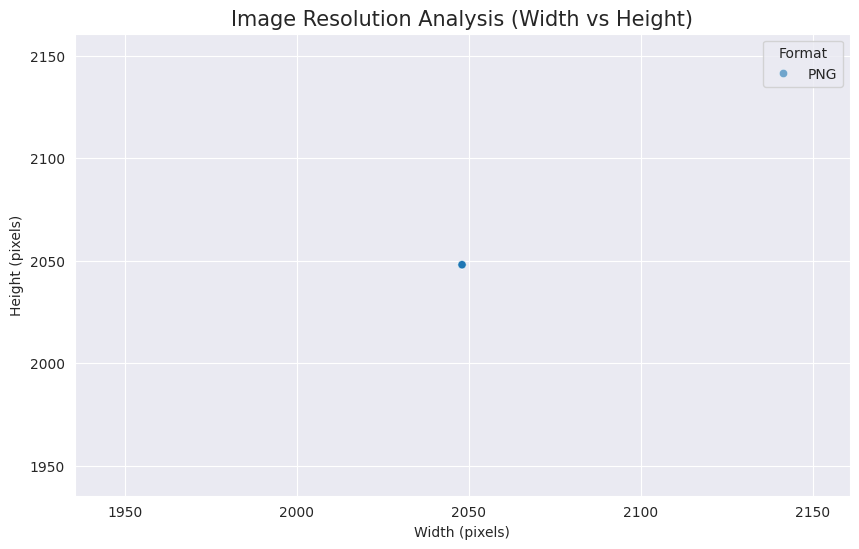

--- Image Resolution Summary ---
        Width  Height
count  1809.0  1809.0
mean   2048.0  2048.0
std       0.0     0.0
min    2048.0  2048.0
25%    2048.0  2048.0
50%    2048.0  2048.0
75%    2048.0  2048.0
max    2048.0  2048.0

--- Image Formats ---
Format
PNG    1809
Name: count, dtype: int64

--- Image Modes (Color Channels) ---
Mode
RGB    1809
Name: count, dtype: int64


In [5]:
#  Analyze image resolutions and formats

# We will sample the data to save time if the dataset is huge 
# If dataset is small (<10k), you can run on all of them.
sample_df = df.sample(min(len(df), 2000)) 

widths = []
heights = []
formats = []
modes = [] # e.g. RGB, Grayscale

for img_path in sample_df['path']:
    try:
        with Image.open(img_path) as img:
            widths.append(img.size[0])
            heights.append(img.size[1])
            formats.append(img.format)
            modes.append(img.mode)
    except Exception as e:
        print(f"Error reading {img_path}: {e}")

# Create analysis dataframe
res_df = pd.DataFrame({
    'Width': widths,
    'Height': heights,
    'Format': formats,
    'Mode': modes
})

# Plot Resolution Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(data=res_df, x='Width', y='Height', hue='Format', alpha=0.6)
plt.title('Image Resolution Analysis (Width vs Height)', fontsize=15)
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()

# Print summary
print("--- Image Resolution Summary ---")
print(res_df.describe())
print("\n--- Image Formats ---")
print(res_df['Format'].value_counts())
print("\n--- Image Modes (Color Channels) ---")
print(res_df['Mode'].value_counts())

In [6]:
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_effnet
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.config.optimizer.set_jit(False)
print(tf.config.list_physical_devices('GPU'))


# Settings for reproducibility and visualization
np.random.seed(42)
sns.set_style("darkgrid")

2025-12-28 07:41:46.822777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766907707.006189      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766907707.057925      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766907707.508707      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766907707.508737      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766907707.508739      55 computation_placer.cc:177] computation placer alr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
# Create a subset of 1000 images to speed up processing
# Assumes 'df' exists from your previous EDA steps
if 'df' in locals():
    subset_df = df.sample(n=min(1000, len(df)), random_state=42).reset_index(drop=True)
    print(f"Processing subset of {len(subset_df)} images.")
else:
    print("Error: 'df' not found. Please run the Data Loading step first.")

Processing subset of 1000 images.


In [8]:
def extract_features(model, preprocess_func, dataframe, target_size=(224, 224)):
    """Extracts features from images using a pretrained model."""
    features = []
    labels = []
    
    print(f"Extracting features using {model.name}...")
    for idx, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
        img_path = row['path']
        label = row['label']
        
        try:
            # Load and preprocess image
            img = image.load_img(img_path, target_size=target_size)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_func(x)
            
            # Extract features (flattened vector)
            feat = model.predict(x, verbose=0).flatten()
            features.append(feat)
            labels.append(label)
        except Exception as e:
            continue # Skip corrupted images

    return np.array(features), np.array(labels)

In [9]:
# 1. Load Model
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# 2. Extract Features
features_resnet, labels_resnet = extract_features(model_resnet, preprocess_resnet, subset_df)

# 3. Perform PCA (Reduce to 3D)
pca_resnet = PCA(n_components=3)
pca_res_result = pca_resnet.fit_transform(features_resnet)

# 4. Create DataFrame
df_pca_resnet = pd.DataFrame(pca_res_result, columns=['PC1', 'PC2', 'PC3'])
df_pca_resnet['Class'] = labels_resnet
print(f"ResNet50 Features shape: {features_resnet.shape}")

I0000 00:00:1766907719.306346      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracting features using resnet50...


  0%|          | 0/1000 [00:00<?, ?it/s]WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
I0000 00:00:1766907724.497243     125 service.cc:152] XLA service 0x7bc428004a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766907724.497281     125 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1766907725.270129     125 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1766907727.655723     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|██████████| 1000/1000 [03:09<00:00,  5.27it/s]

ResNet50 Features shape: (905, 2048)


In [10]:
# 1. Load Model
model_effnet = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# 2. Extract Features
features_effnet, labels_effnet = extract_features(model_effnet, preprocess_effnet, subset_df)

# 3. Perform PCA (Reduce to 3D)
pca_effnet = PCA(n_components=3)
pca_eff_result = pca_effnet.fit_transform(features_effnet)

# 4. Create DataFrame
df_pca_effnet = pd.DataFrame(pca_eff_result, columns=['PC1', 'PC2', 'PC3'])
df_pca_effnet['Class'] = labels_effnet
print(f"EfficientNetB0 Features shape: {features_effnet.shape}")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Extracting features using efficientnetb0...


100%|██████████| 1000/1000 [02:27<00:00,  6.76it/s]

EfficientNetB0 Features shape: (905, 1280)


In [11]:
def plot_pca_results(df_pca, model_name):
    unique_classes = df_pca['Class'].unique()
    
    # --- 2D Scatter Plot ---
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Class', palette='tab10', s=60, alpha=0.7)
    plt.title(f'{model_name}: 2D PCA Projection', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # --- 3D Scatter Plot ---
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Generate colors for 3D plot
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))
    color_map = dict(zip(unique_classes, colors))
    
    for cls in unique_classes:
        subset = df_pca[df_pca['Class'] == cls]
        ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], 
                   label=cls, s=50, alpha=0.6, c=[color_map[cls]] * len(subset))

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'{model_name}: 3D PCA Projection', fontsize=14)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Visualizing ResNet50 Results...


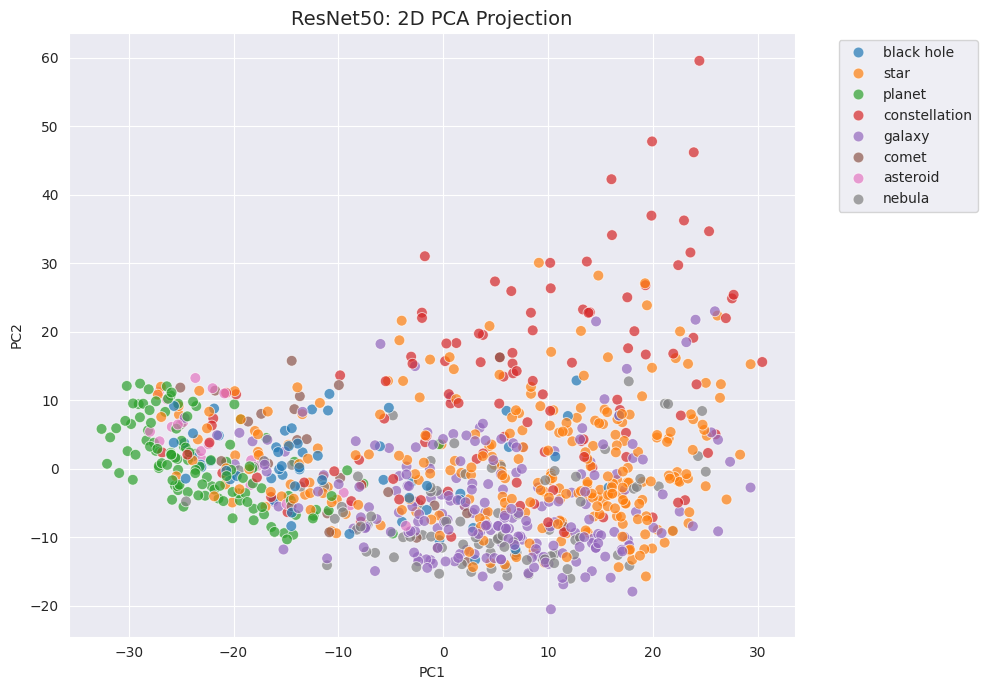

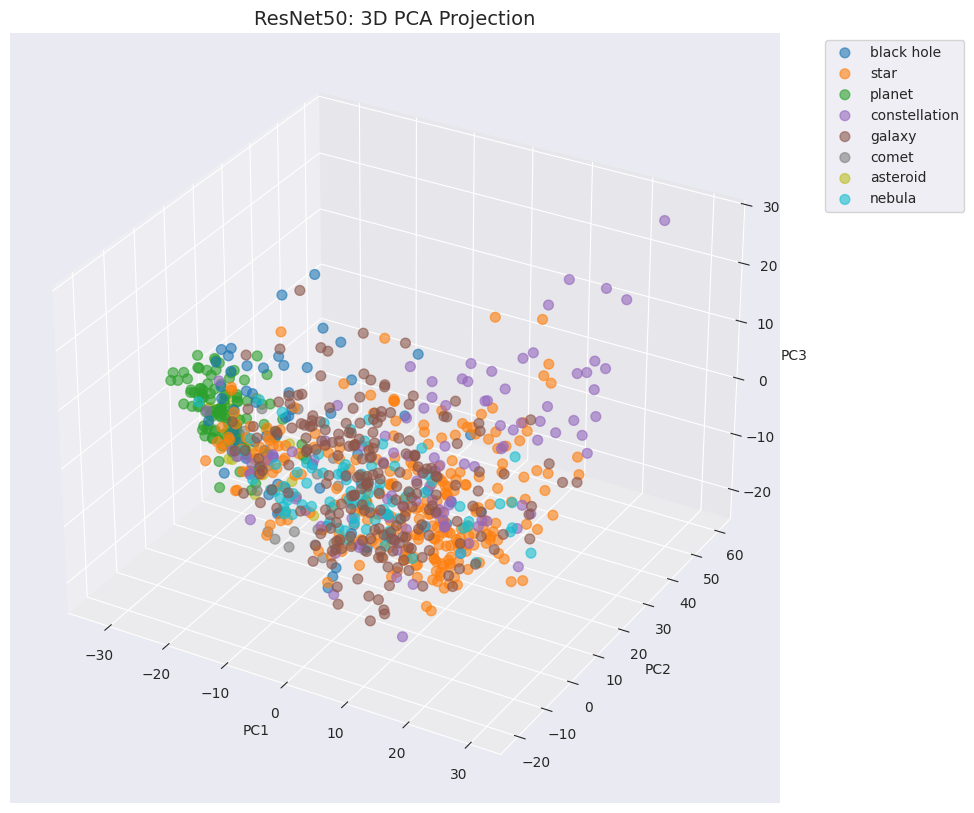

Visualizing EfficientNetB0 Results...


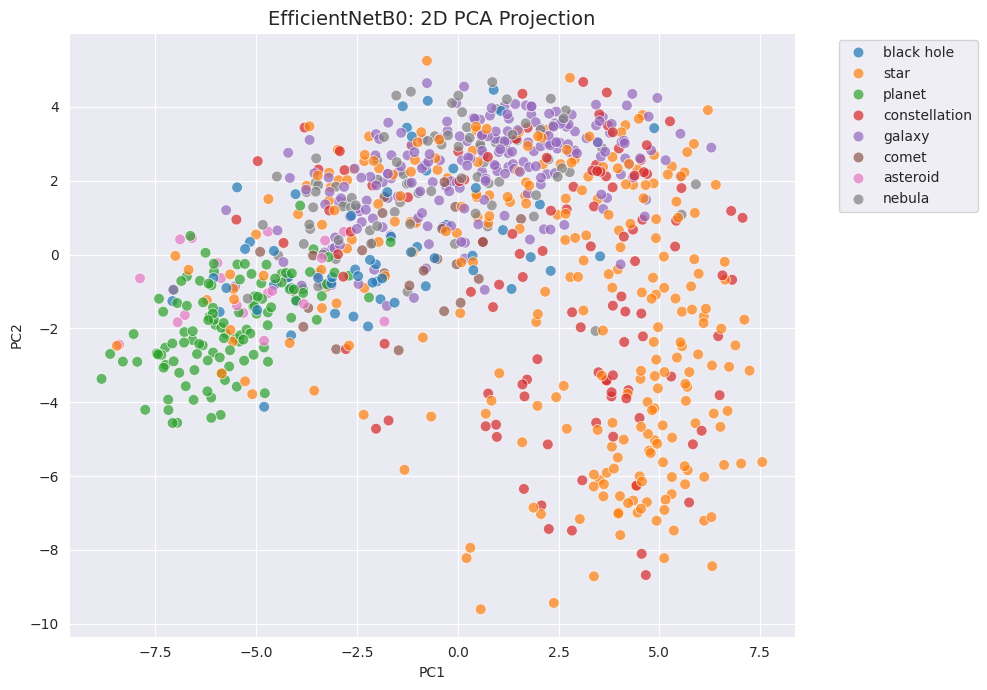

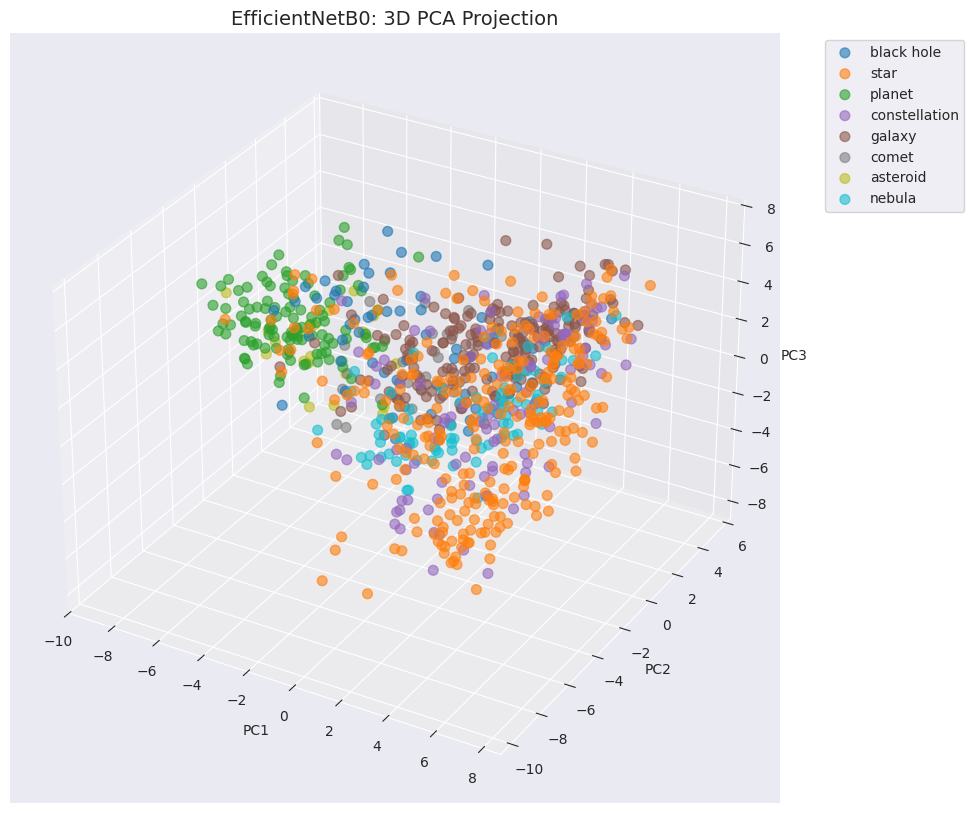

In [12]:
# Visualize ResNet50
print("Visualizing ResNet50 Results...")
plot_pca_results(df_pca_resnet, "ResNet50")

# Visualize EfficientNetB0
print("Visualizing EfficientNetB0 Results...")
plot_pca_results(df_pca_effnet, "EfficientNetB0")

In [13]:
#openai clip

In [14]:
!pip install transformers

In [15]:
import torch
from transformers import CLIPProcessor, CLIPModel

In [16]:
# Load OpenAI CLIP Model
# "vit-base-patch32" is the standard version (good balance of speed and accuracy)
model_id = "openai/clip-vit-base-patch32"
print(f"Loading CLIP model: {model_id}...")
model_clip = CLIPModel.from_pretrained(model_id)
processor_clip = CLIPProcessor.from_pretrained(model_id)

# Move to GPU if available (Faster!)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_clip.to(device)
print(f"Model loaded on {device}")

Loading CLIP model: openai/clip-vit-base-patch32...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Model loaded on cuda


In [17]:

#i  am  just exparminting  which  one model  gives  the  best  output  
def extract_clip_features(dataframe):
    features = []
    labels = []
    
    print(f"Extracting features using CLIP...")
    
    # Loop through images
    for idx, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
        img_path = row['path']
        label = row['label']
        
        try:
            # 1. Open Image
            image = Image.open(img_path).convert("RGB") # CLIP needs RGB
            
            # 2. Preprocess (CLIP handles resizing and normalization internally)
            inputs = processor_clip(images=image, return_tensors="pt").to(device)
            
            # 3. Extract Features
            with torch.no_grad(): # Disable gradient calculation (saves memory)
                image_features = model_clip.get_image_features(**inputs)
            
            # 4. Flatten and store
            # .cpu().numpy() moves data from GPU memory back to normal RAM
            feat = image_features.cpu().numpy().flatten()
            
            features.append(feat)
            labels.append(label)
            
        except Exception as e:
            # Skip corrupted images silently
            continue

    return np.array(features), np.array(labels)

# Run the extraction on your subset_df
features_clip, labels_clip = extract_clip_features(subset_df)

print(f"CLIP Features shape: {features_clip.shape}")

Extracting features using CLIP...


100%|██████████| 1000/1000 [02:12<00:00,  7.57it/s]

CLIP Features shape: (905, 512)


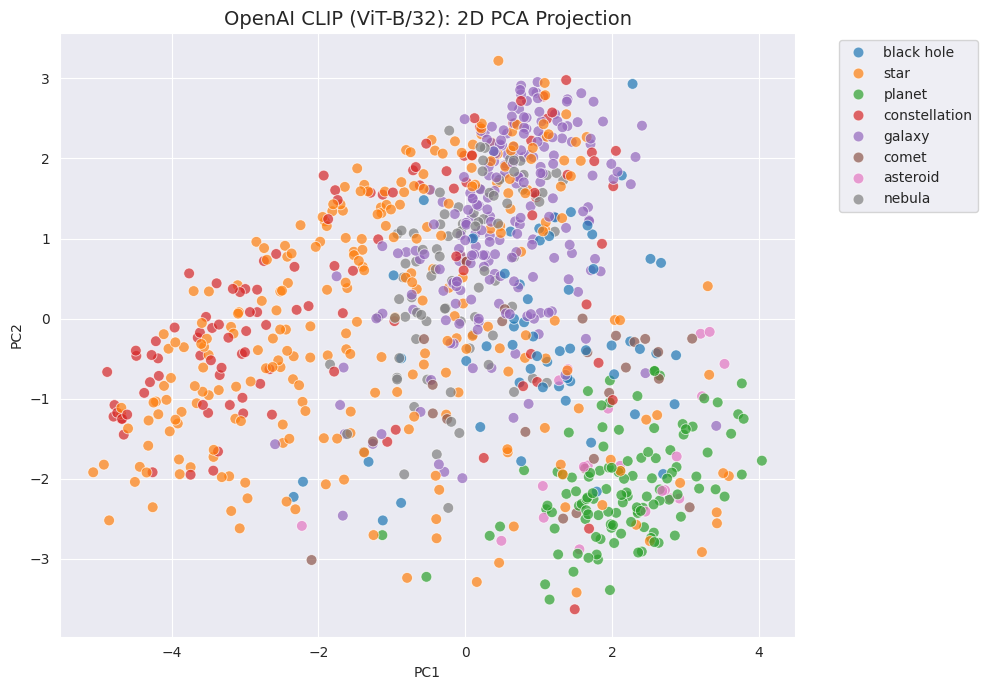

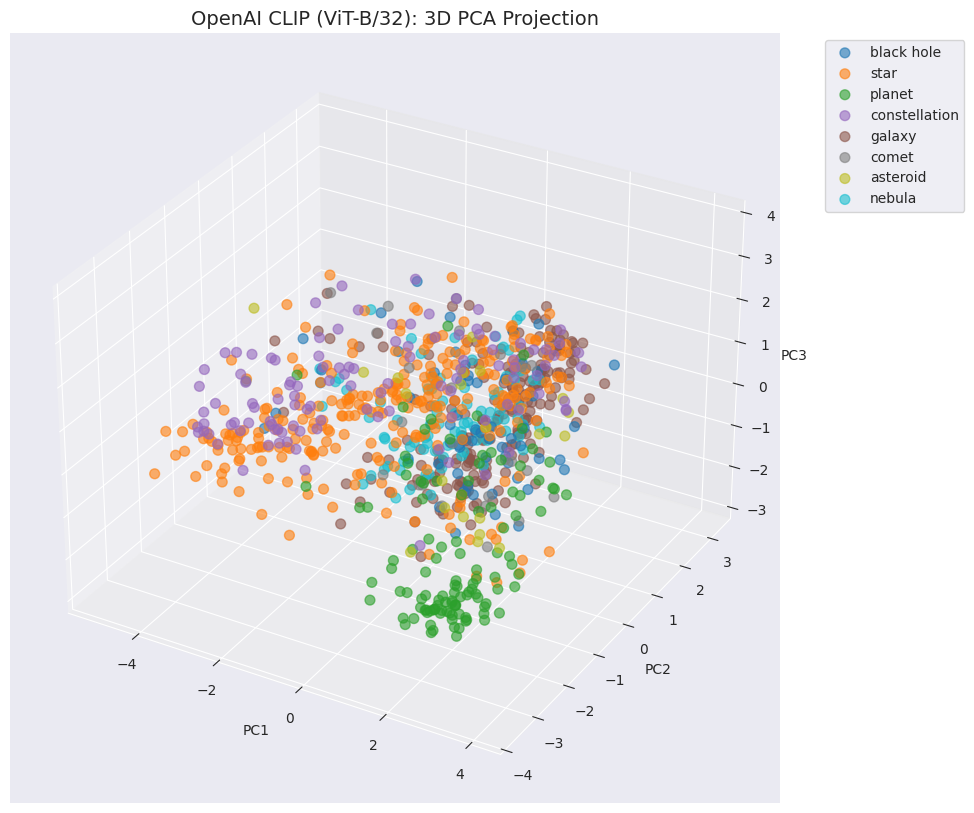

In [18]:
# 1. PCA Reduction
pca_clip = PCA(n_components=3)
pca_clip_result = pca_clip.fit_transform(features_clip)

# 2. Create DataFrame
df_pca_clip = pd.DataFrame(pca_clip_result, columns=['PC1', 'PC2', 'PC3'])
df_pca_clip['Class'] = labels_clip

# 3. Reuse your plotting function
# (Make sure you have run the 'plot_pca_results' function cell from before)
plot_pca_results(df_pca_clip, "OpenAI CLIP (ViT-B/32)")

In [22]:
from sklearn.manifold import TSNE
import time

In [20]:
# n_iter=1000 gives it enough time to organize the points.
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, random_state=42)

# Fit and Transform
tsne_results = tsne.fit_transform(features_clip)

# Create DataFrame for Plotting
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['Class'] = labels_clip

print("t-SNE Complete!")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 905 samples in 0.001s...
[t-SNE] Computed neighbors for 905 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 905 / 905
[t-SNE] Mean sigma: 1.550815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.135269
[t-SNE] KL divergence after 1000 iterations: 1.044083
t-SNE Complete!


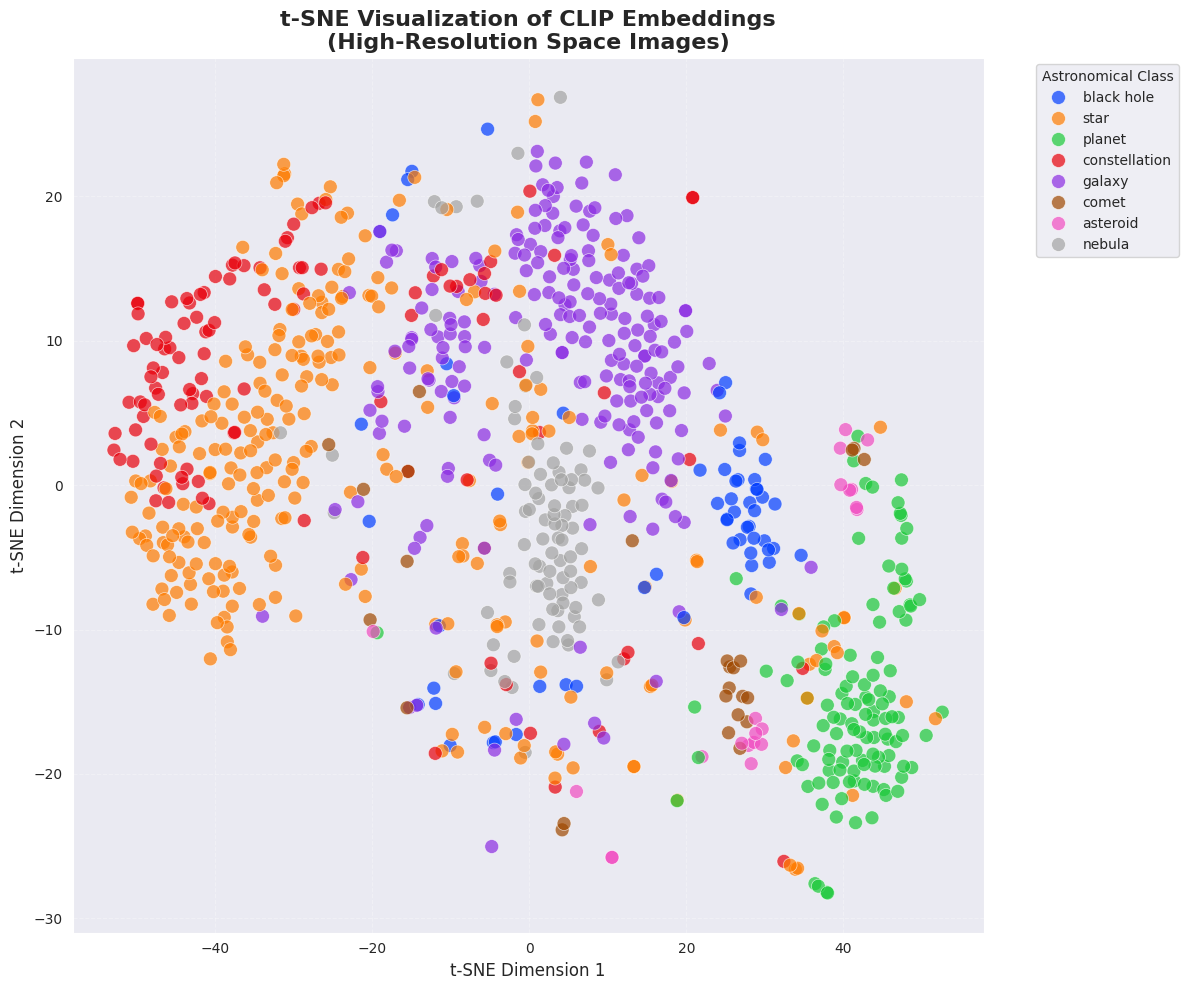

In [21]:
plt.figure(figsize=(12, 10))

# Create the scatter plot
scatter = sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='Class',
    palette='bright',  # 'bright' or 'tab10' makes colors pop more
    s=100,             # Larger dot size for better visibility
    alpha=0.7,         # Slight transparency to see overlapping points
    edgecolor='w',     # White edge makes dots distinct
    linewidth=0.5
)

# Aesthetics
plt.title('t-SNE Visualization of CLIP Embeddings\n(High-Resolution Space Images)', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Astronomical Class", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3) # Subtle grid
plt.tight_layout()

plt.show()

In [25]:
start_time = time.time()

# Configure t-SNE for 3 components
tsne_3d = TSNE(
    n_components=3, 
    verbose=1, 
    perplexity=30, 
    n_iter=1000, 
    random_state=42
)

# Fit and Transform using your CLIP features
# Ensure 'features_clip' exists from the previous steps
tsne_3d_results = tsne_3d.fit_transform(features_clip)

# Create DataFrame
df_tsne_3d = pd.DataFrame(tsne_3d_results, columns=['x', 'y', 'z'])
df_tsne_3d['Class'] = labels_clip

print(f"3D t-SNE Complete! Time taken: {time.time() - start_time:.2f} seconds")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 905 samples in 0.001s...
[t-SNE] Computed neighbors for 905 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 905 / 905
[t-SNE] Mean sigma: 1.550815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.218849
[t-SNE] KL divergence after 1000 iterations: 0.898926
3D t-SNE Complete! Time taken: 10.58 seconds


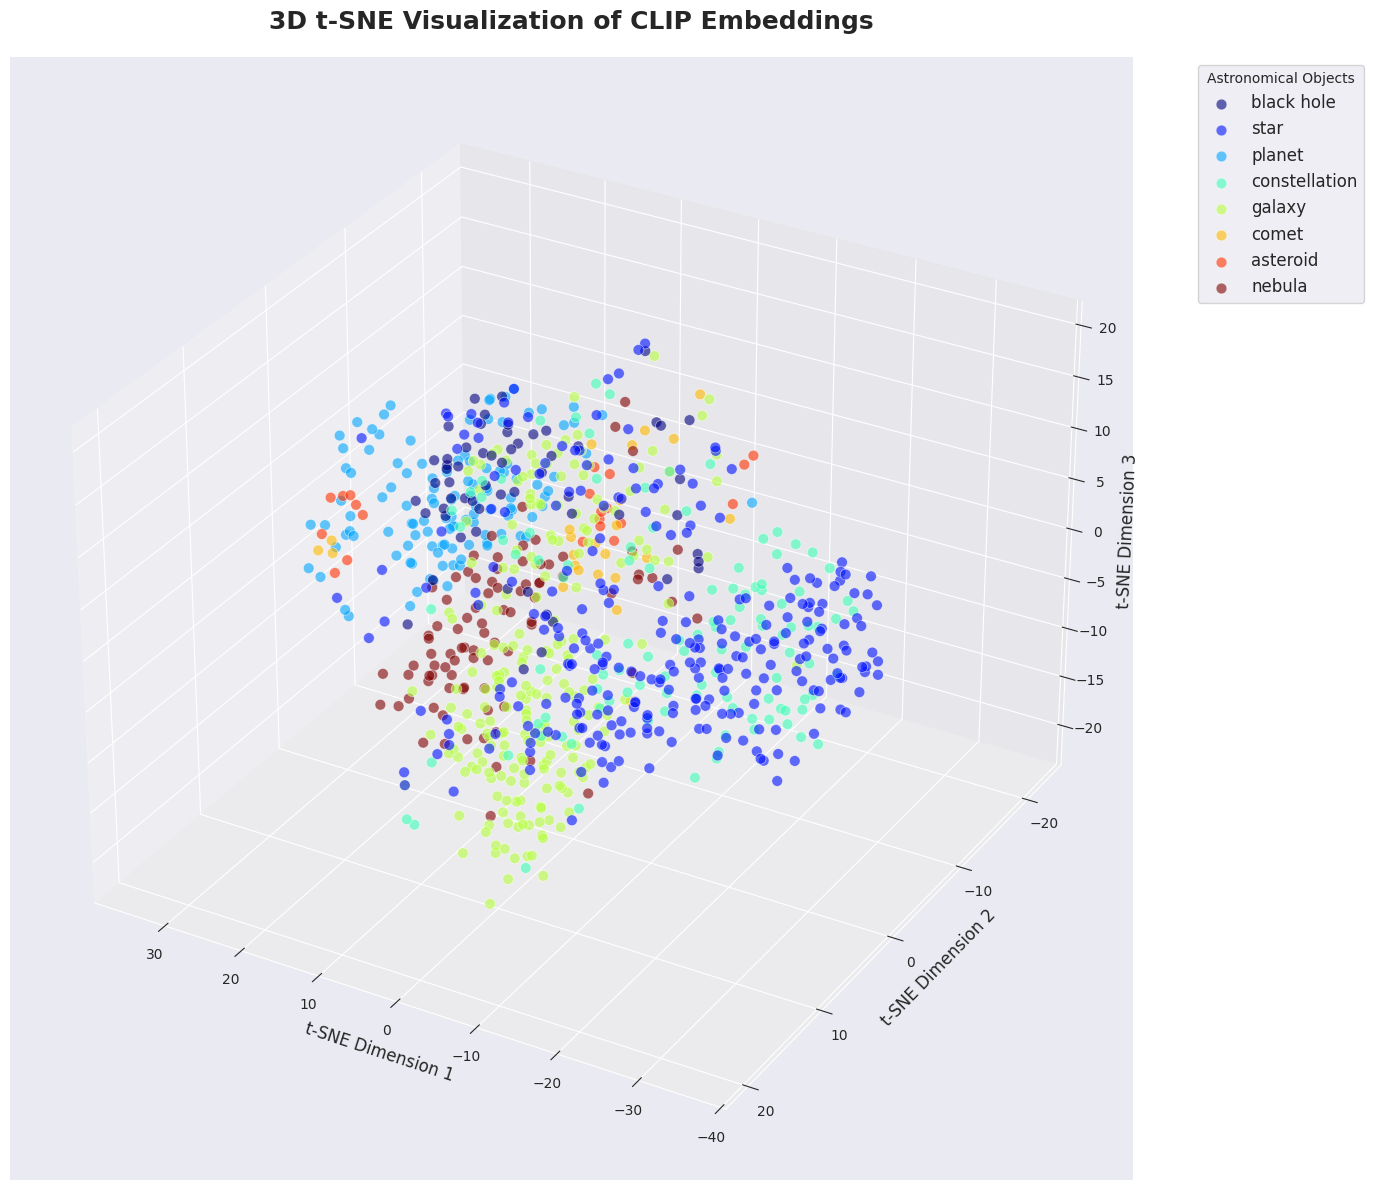

In [26]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Get unique classes and generate a color palette
unique_classes = df_tsne_3d['Class'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))
color_map = dict(zip(unique_classes, colors))

# Loop through each class to plot
for cls in unique_classes:
    subset = df_tsne_3d[df_tsne_3d['Class'] == cls]
    
    ax.scatter(
        subset['x'], subset['y'], subset['z'],
        c=[color_map[cls]],  # Color for this class
        label=cls,
        s=60,                # Size of dots
        alpha=0.6,           # Transparency
        edgecolors='w',      # White edges for better visibility
        linewidth=0.5
    )

# Visual styling
ax.set_title('3D t-SNE Visualization of CLIP Embeddings', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
ax.set_zlabel('t-SNE Dimension 3', fontsize=12)

# Legend settings
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Astronomical Objects", fontsize=12)

# Initial viewing angle (Elev=30, Azim=120 usually gives a good perspective)
ax.view_init(elev=30, azim=120)

plt.tight_layout()
plt.show()

In [27]:
!pip install umap-learn

In [28]:
import umap

Running 2D UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


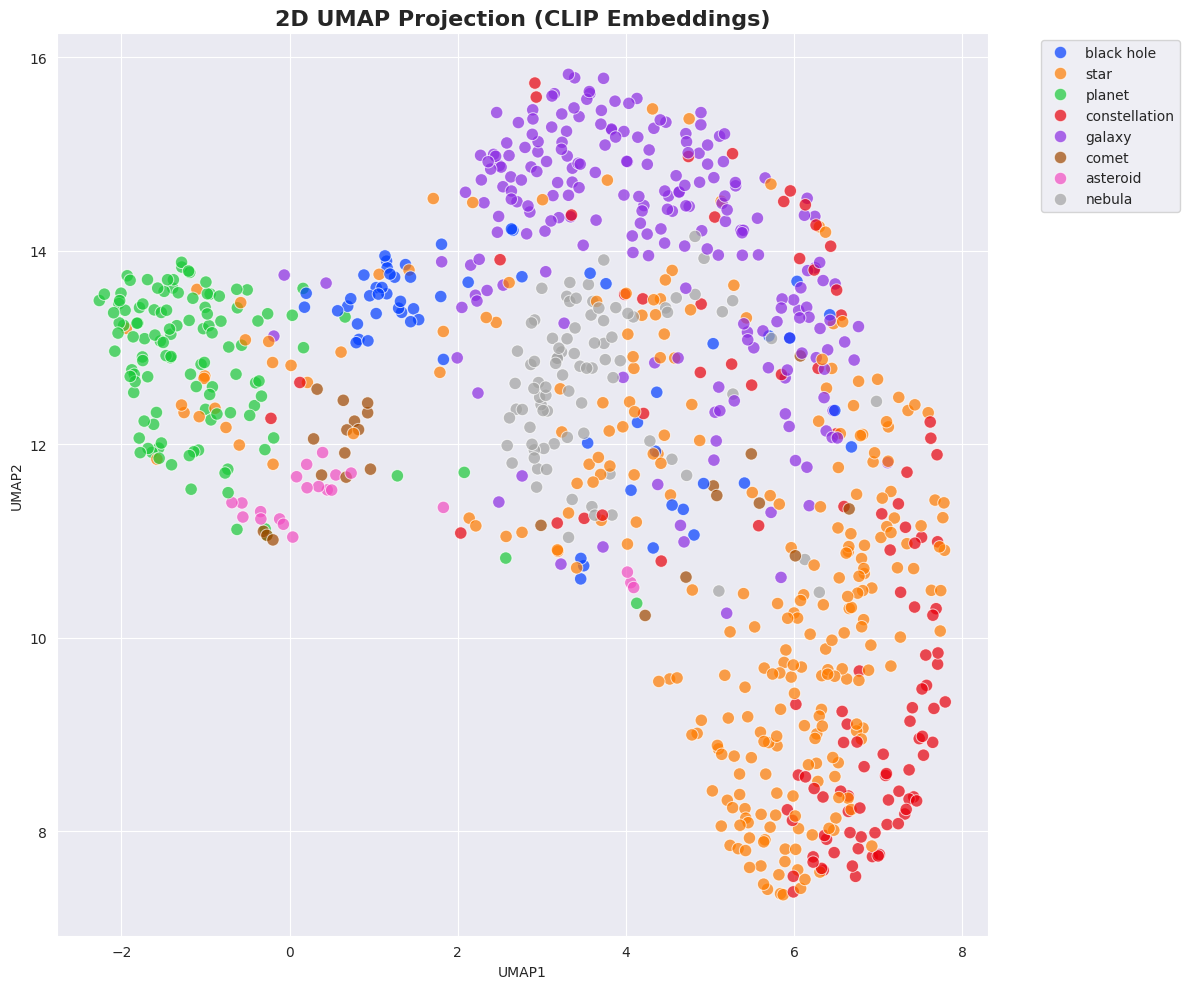

In [29]:
print("Running 2D UMAP...")
# n_neighbors: Controls how UMAP balances local vs global structure (15-50 is good)
# min_dist: Controls how tightly points are packed together (0.1 is tight, 0.5 is loose)
reducer_2d = umap.UMAP(n_neighbors=30, min_dist=0.3, n_components=2, random_state=42)
umap_2d_results = reducer_2d.fit_transform(features_clip)

# 2. Create DataFrame
df_umap_2d = pd.DataFrame(umap_2d_results, columns=['UMAP1', 'UMAP2'])
df_umap_2d['Class'] = labels_clip

# 3. Plot
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_umap_2d, x='UMAP1', y='UMAP2', hue='Class',
    palette='bright', s=80, alpha=0.7, edgecolor='w'
)
plt.title('2D UMAP Projection (CLIP Embeddings)', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Running 3D UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


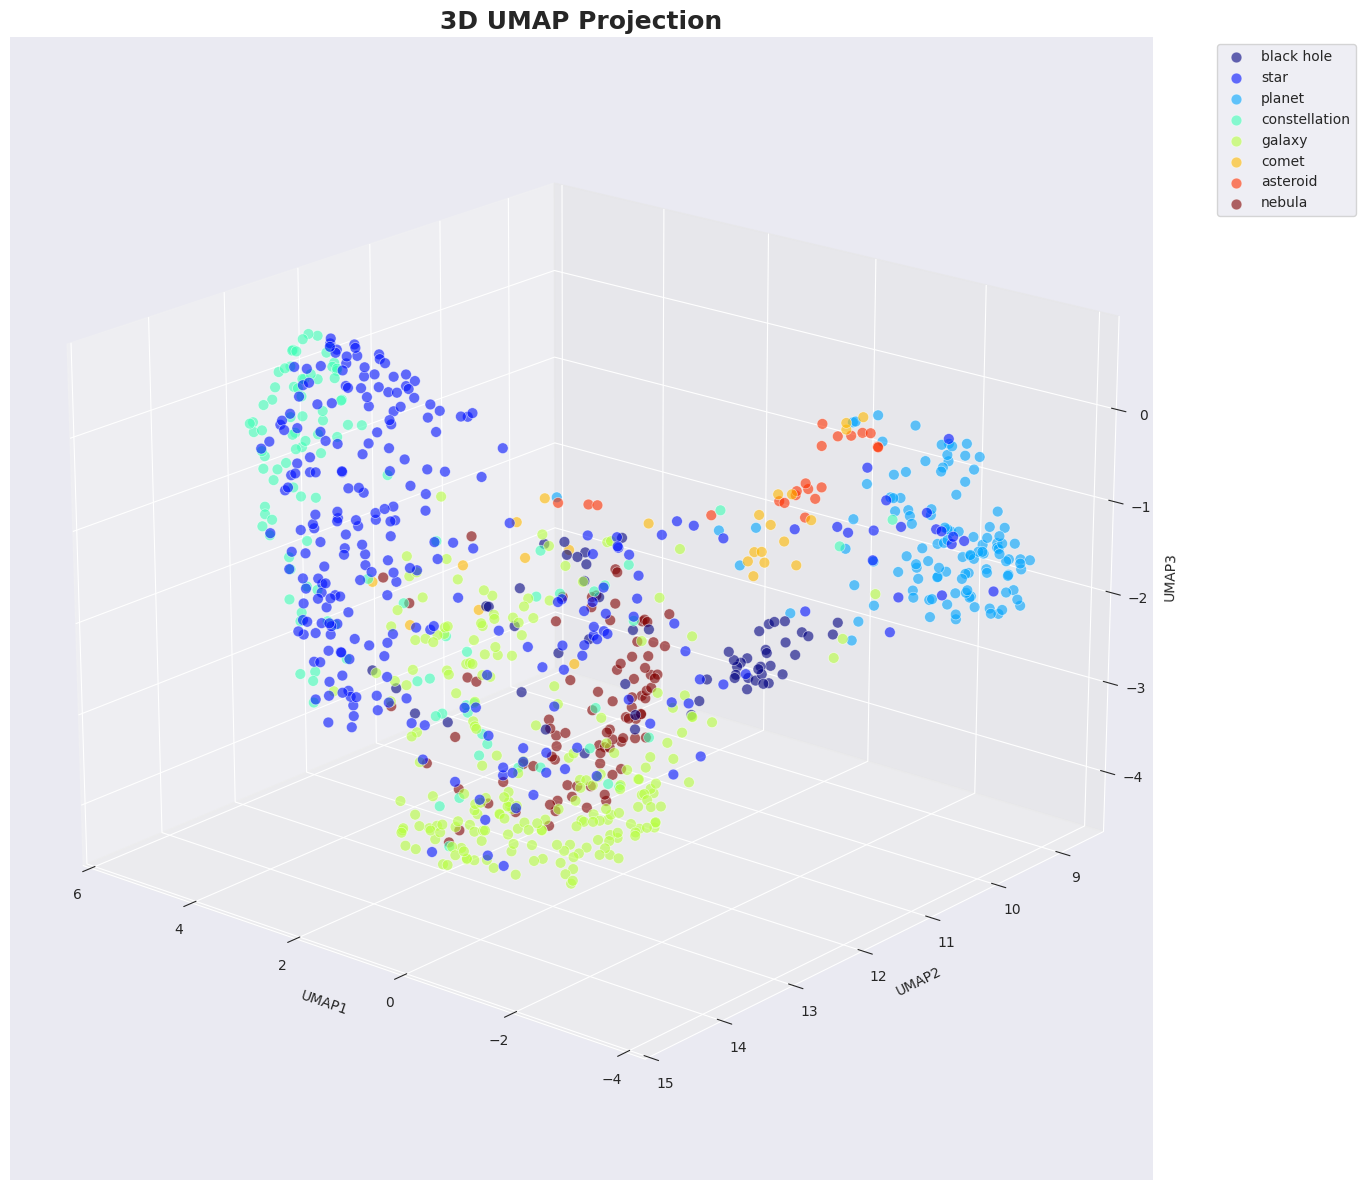

In [30]:
# 1. Run UMAP (Reduce to 3 Dimensions)
print("Running 3D UMAP...")
reducer_3d = umap.UMAP(n_neighbors=30, min_dist=0.3, n_components=3, random_state=42)
umap_3d_results = reducer_3d.fit_transform(features_clip)

# 2. Create DataFrame
df_umap_3d = pd.DataFrame(umap_3d_results, columns=['x', 'y', 'z'])
df_umap_3d['Class'] = labels_clip

# 3. Plot 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Color mapping
unique_classes = df_umap_3d['Class'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))
color_map = dict(zip(unique_classes, colors))

for cls in unique_classes:
    subset = df_umap_3d[df_umap_3d['Class'] == cls]
    ax.scatter(
        subset['x'], subset['y'], subset['z'],
        c=[color_map[cls]], label=cls,
        s=60, alpha=0.6, edgecolors='w', linewidth=0.5
    )

ax.set_title('3D UMAP Projection', fontsize=18, fontweight='bold')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.view_init(elev=20, azim=130) # Good default angle

plt.tight_layout()
plt.show()

In [31]:
from transformers import ViTImageProcessor, ViTModel

# Define the model ID
model_id = 'google/vit-base-patch16-224'

print(f"Loading ViT Model: {model_id}...")

# Load Processor (handles resizing/normalizing) and Model
processor_vit = ViTImageProcessor.from_pretrained(model_id)
model_vit = ViTModel.from_pretrained(model_id)

# Move to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model_vit.to(device)
print(f"ViT Loaded on {device}")

Loading ViT Model: google/vit-base-patch16-224...


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViT Loaded on cuda


In [32]:
def extract_vit_features(dataframe):
    features = []
    labels = []
    
    print("Extracting features using ViT...")
    
    for idx, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
        img_path = row['path']
        label = row['label']
        
        try:
            # 1. Load Image (Ensure RGB)
            image = Image.open(img_path).convert("RGB")
            
            #  Preprocess
            inputs = processor_vit(images=image, return_tensors="pt").to(device)
            
            # Extract Features
            with torch.no_grad():
                outputs = model_vit(**inputs)
            
            last_hidden_states = outputs.last_hidden_state
            cls_token = last_hidden_states[:, 0, :] 
            
            # Flatten to vector
            feat = cls_token.cpu().numpy().flatten()
            
            features.append(feat)
            labels.append(label)
            
        except Exception as e:
            continue

    return np.array(features), np.array(labels)

# Run Extraction
features_vit, labels_vit = extract_vit_features(subset_df)
print(f"ViT Features Shape: {features_vit.shape}")

Extracting features using ViT...


100%|██████████| 1000/1000 [02:07<00:00,  7.82it/s]

ViT Features Shape: (905, 768)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


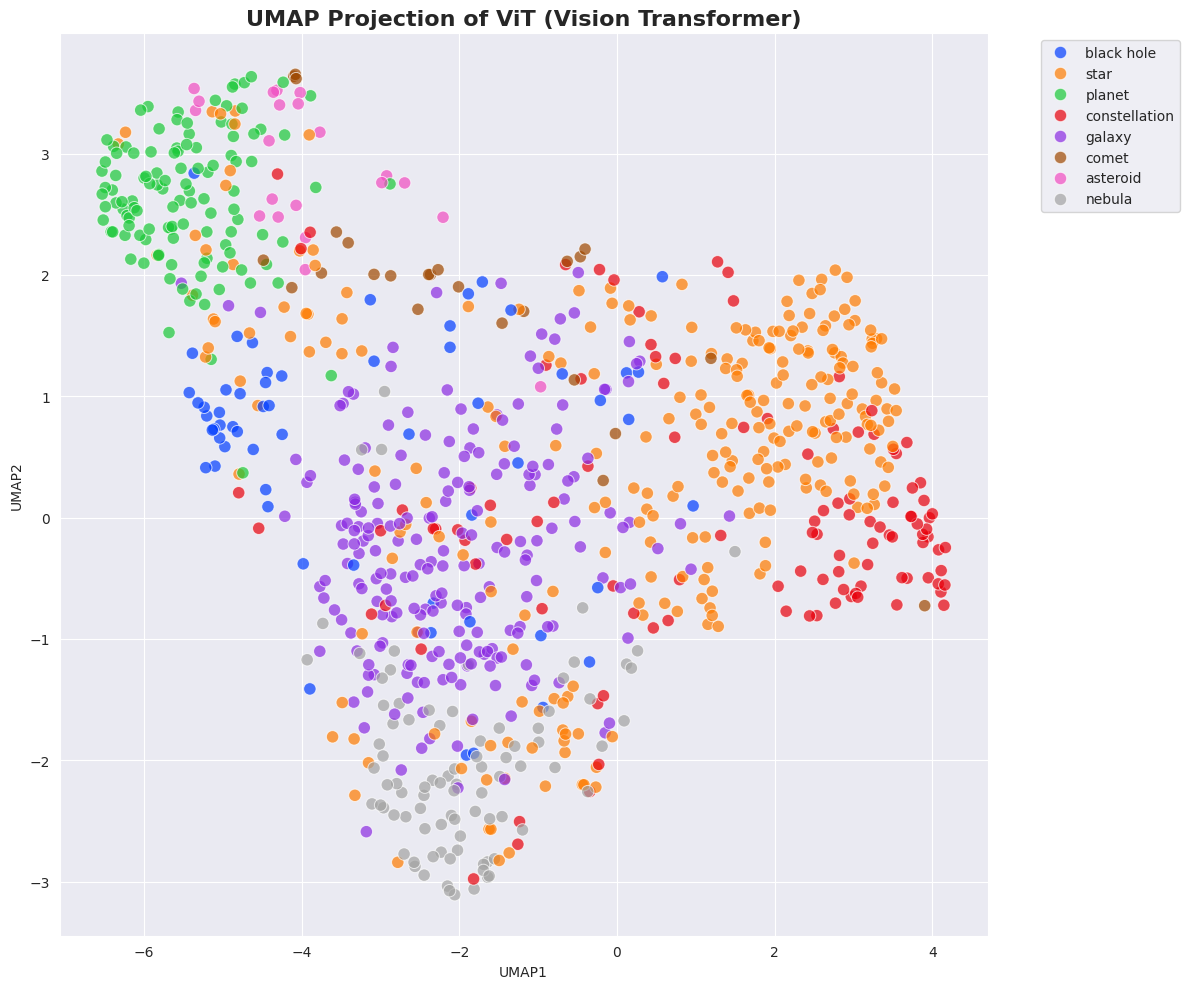

In [33]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.3, n_components=2, random_state=42)
vit_umap_results = reducer.fit_transform(features_vit)

# Plot
df_vit = pd.DataFrame(vit_umap_results, columns=['UMAP1', 'UMAP2'])
df_vit['Class'] = labels_vit

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_vit, x='UMAP1', y='UMAP2', hue='Class',
    palette='bright', s=80, alpha=0.7, edgecolor='w'
)
plt.title(f'UMAP Projection of ViT (Vision Transformer)', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


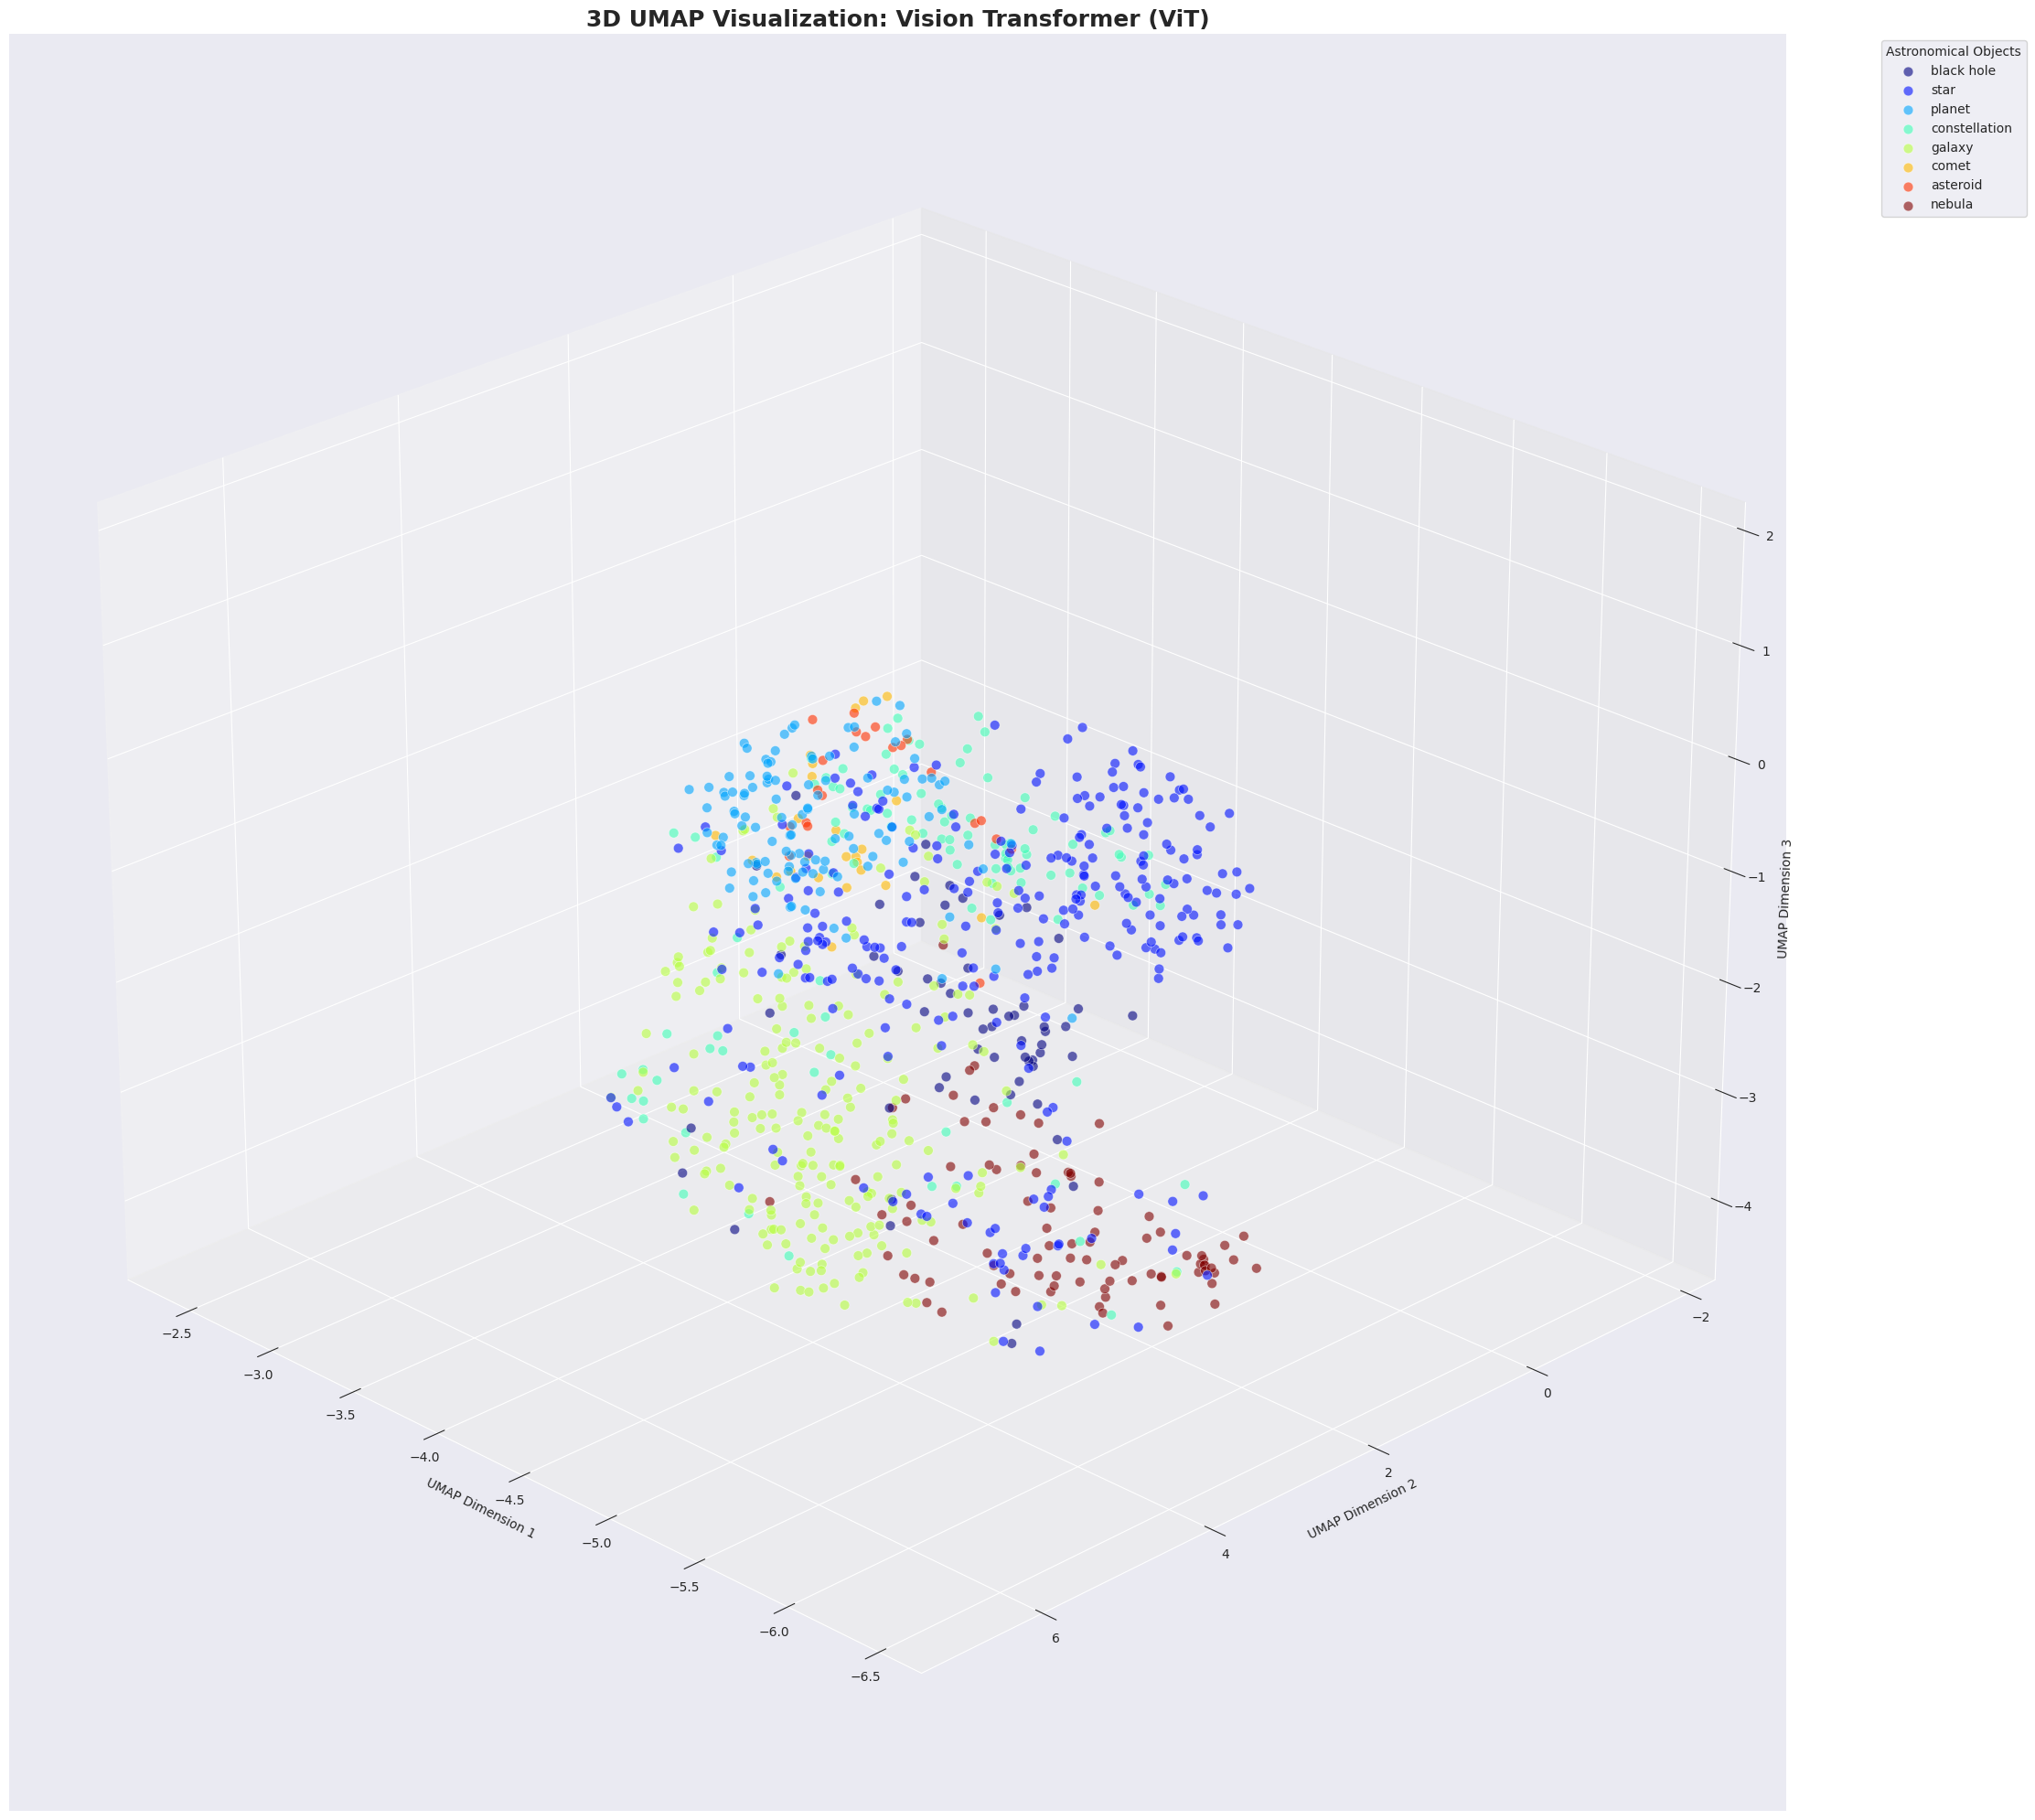

In [37]:
reducer_vit_3d = umap.UMAP(n_neighbors=30, min_dist=0.3, n_components=3, random_state=42)
vit_3d_results = reducer_vit_3d.fit_transform(features_vit)

df_vit_3d = pd.DataFrame(vit_3d_results, columns=['x', 'y', 'z'])
df_vit_3d['Class'] = labels_vit

#  Create 3D Plot
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111, projection='3d')

# Generate colors
unique_classes = df_vit_3d['Class'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_classes)))
color_map = dict(zip(unique_classes, colors))

# Plot each class
for cls in unique_classes:
    subset = df_vit_3d[df_vit_3d['Class'] == cls]
    ax.scatter(
        subset['x'], subset['y'], subset['z'],
        c=[color_map[cls]], 
        label=cls,
        s=60, 
        alpha=0.6, 
        edgecolors='w', 
        linewidth=0.5
    )

# Visual Styling
ax.set_title('3D UMAP Visualization: Vision Transformer (ViT)', fontsize=18, fontweight='bold')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Astronomical Objects")

# Set a good viewing angle
ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()